# Project Unsupervised Learning: AllLife Bank Customer Segmentation

By: Lakshmi Devesh Kumar


## Problem Statement

### Context


AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run personalized campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service delivery model, to ensure that customer queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out to the Data Science team for help


### Objective

To identify different segments in the existing customer, based on their spending patterns as well as past interaction with the bank, using clustering algorithms, and provide recommendations to the bank on how to better market to and service these customers.


###  Data Description

The data provided is of various customers of a bank and their financial attributes like credit limit, the total number of credit cards the customer has, and different channels through which customers have contacted the bank for any queries (including visiting the bank, online and through a call center).

**Data Dictionary**

- Sl_No: Primary key of the records
- Customer Key: Customer identification number
- Average Credit Limit: Average credit limit of each customer for all credit cards
- Total credit cards: Total number of credit cards possessed by the customer
- Total visits bank: Total number of Visits that customer made (yearly) personally to the bank
- Total visits online: Total number of visits or online logins made by the customer (yearly)
- Total calls made: Total number of calls made by the customer to the bank or its customer service department (yearly)

## Importing necessary libraries and data

In [1]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_theme()

# Removes the limit for the number of displayed columns
pd.set_option("display.max_columns", None)
# Sets the limit for the number of displayed rows
pd.set_option("display.max_rows", 200)

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist, pdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

# to perform hierarchical clustering, compute cophenetic correlation, and create dendrograms
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage, cophenet

# to suppress warnings
import warnings

warnings.filterwarnings("ignore")




In [2]:
# Run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Loading the Dataset



In [3]:
# read the data
data = pd.read_csv("/content/drive/MyDrive/Python Course/Project 4/Credit+Card+Customer+Data.csv")

## Data Overview

- Observations


In [4]:
#Make a copy of the dataset data so that we do not accidentally make changes to the original dataset.
df = data.copy()

In [5]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

In [6]:
# shape of the dataset
df.shape
print("There are", df.shape[0], 'rows and', df.shape[1], "columns.")

There are 660 rows and 7 columns.


In [7]:
# Take a look at the first 10 rows of the dataset
df.head(10)

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3
5,6,58634,20000,3,0,1,8
6,7,48370,100000,5,0,11,2
7,8,37376,15000,3,0,1,1
8,9,82490,5000,2,0,2,2
9,10,44770,3000,4,0,1,7


In [8]:
# Take a look at the last 10 rows of the dataset
df.tail(10)

,Sl_No,Customer_Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
650,651,78996,195000,10,1,12,2
651,652,78404,132000,9,1,12,2
652,653,28525,156000,8,1,8,0
653,654,51826,95000,10,0,15,1
654,655,65750,172000,10,1,9,1
655,656,51108,99000,10,1,10,0
656,657,60732,84000,10,1,13,2
657,658,53834,145000,8,1,9,1
658,659,80655,172000,10,1,15,0
659,660,80150,167000,9,0,12,2


In [9]:
# Get the number of uniques rows for each feature in the dataset
df.nunique()

Sl_No                  660
Customer_Key           655
Avg_Credit_Limit       110
Total_Credit_Cards      10
Total_visits_bank        6
Total_visits_online     16
Total_calls_made        11
dtype: int64

In [10]:
# Use info() to print a concise summary of the DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer_Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


### Observations:
* The dataset has 660 rows and 7 columns.
* All the columns are numerical columns.

### Statistical summary

In [11]:
#Statistical summary of the datset
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Sl_No,660.0,330.500000,190.669872,1.0,165.75,330.5,495.25,660.0
Customer_Key,660.0,55141.443939,25627.772200,11265.0,33825.25,53874.5,77202.50,99843.0
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.00,18000.0,48000.00,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.00,5.0,6.00,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.00,2.0,4.00,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.00,2.0,4.00,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.00,3.0,5.00,10.0


### Observations:
* The SL_NO and Customer_key seem to be serial number and customer ID and might be uniques values mostly and might need to be dropped as they might not add any value to the analysis.
* Avg_Credit_Limit has a min. value of 3,000 and max. value of 200,000 which indicate the presence of higher outliers and data distribution might be highly right skewed.
* Total_visits_online has a min. value of 0 and max value of 15, with a mean value of onl about 3. This also indicates possible higher outliers and right skewed distribution. Some customers are definitely more tech savvy than others.

## Data Preprocessing

#### Duplicate value check

In [12]:
df[df.duplicated()].count()

Sl_No                  0
Customer_Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [13]:
# let's check for duplicate observations
df.duplicated().sum()

0

#### Missing value treatment

In [14]:
# checking missing values
df.isna().sum()

Sl_No                  0
Customer_Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [15]:
# checking missing values
df.isnull().sum()

Sl_No                  0
Customer_Key           0
Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

### Observations
* There are no null values in the dataset
* There are no duplicate rows in the dataset.

In [16]:
df["Customer_Key"].value_counts()

97935    2
50706    2
47437    2
37252    2
96929    2
        ..
73811    1
72892    1
51773    1
96163    1
80150    1
Name: Customer_Key, Length: 655, dtype: int64

In [17]:
# getting the count for each unique value in Customer_Key
data_grouped = df.groupby("Customer_Key").count()

for i in data_grouped.loc[data_grouped.Sl_No >= 2].index:
    display(data.loc[df.Customer_Key == i])

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
48,49,37252,6000,4,0,2,8
432,433,37252,59000,6,2,1,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
4,5,47437,100000,6,0,12,3
332,333,47437,17000,7,3,1,0


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
411,412,50706,44000,4,5,0,2
541,542,50706,60000,7,5,2,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
391,392,96929,13000,4,5,0,0
398,399,96929,67000,6,2,2,2


,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
104,105,97935,17000,2,1,2,10
632,633,97935,187000,7,1,7,0


### Observations
* The column Sl_No has 660 unique values and would not add any value to the analysis. So, we can drop this column.
* Similarly, the Customer Key column also seems to be the customer number usnique to each cutomer. Out of the 660 observations, there are only 5  Customer Keys being repeated twice. It seems like it is a unique ID given to each customer in the database. The duplicate values might correspond to customer profile changes, and as such, there is no need to delete these records as these are actual occurrences at some point in the time. So, the Customer_Key column might not add any value in our analysis and it can be dropped from the dataset as well.

In [18]:
# drop the Sl_No column
df.drop("Sl_No", axis=1, inplace=True)

# drop the  Customer_Key column
df.drop("Customer_Key", axis=1, inplace=True)

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

**The below functions need to be defined to carry out the Exploratory Data Analysis.**

In [19]:
# function to get the lower and upper bounds in distribution of data for different columns in the dataset

def get_lower_upper(data, upper=True):
    """
    data: Series
    """
    #calculate first quartile Q1
    Q1 = data.quantile(q=0.25)

    #calculate first quartile Q3
    Q3 = data.quantile(q=0.75)

    #calculate Inter Quartile Range (IQR)
    IQR = Q3 - Q1

    if upper == True:
        #Calculate the upper bound
        val = Q3 + 1.5 * IQR
    else:
        #Calculate the lower bound
        val = Q1 - 1.5 * IQR

    return val


In [20]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to the show density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a star will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins, palette="winter"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram
    ax_hist2.axvline(
        data[feature].quantile(q=0.25), color="red", linestyle="-"
    ) # Add 25% to the histogram
    ax_hist2.axvline(
        data[feature].quantile(q=0.75), color="blue", linestyle="-"
    ) # Add 75% to the histogram

    #use the get_lower_upper method to get the lower range and upper range of the data distributions
    upper_range = get_lower_upper(data[feature])
    lower_range = get_lower_upper(data[feature], False)

    ax_hist2.axvline(
        lower_range, color="brown", linestyle="-"
    )# Add the lower range to the histogram

    ax_hist2.axvline(
        upper_range, color="yellow", linestyle="-"
    )# Add the higher range to the histogram

In [21]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 1, 5))
    else:
        plt.figure(figsize=(n + 1, 5))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

### Univariate Analysis

#### Avg Credit Limit

mean:  34574.242424242424  median:  18000.0
lower_range:  -47000.0  upper_range:  105000.0


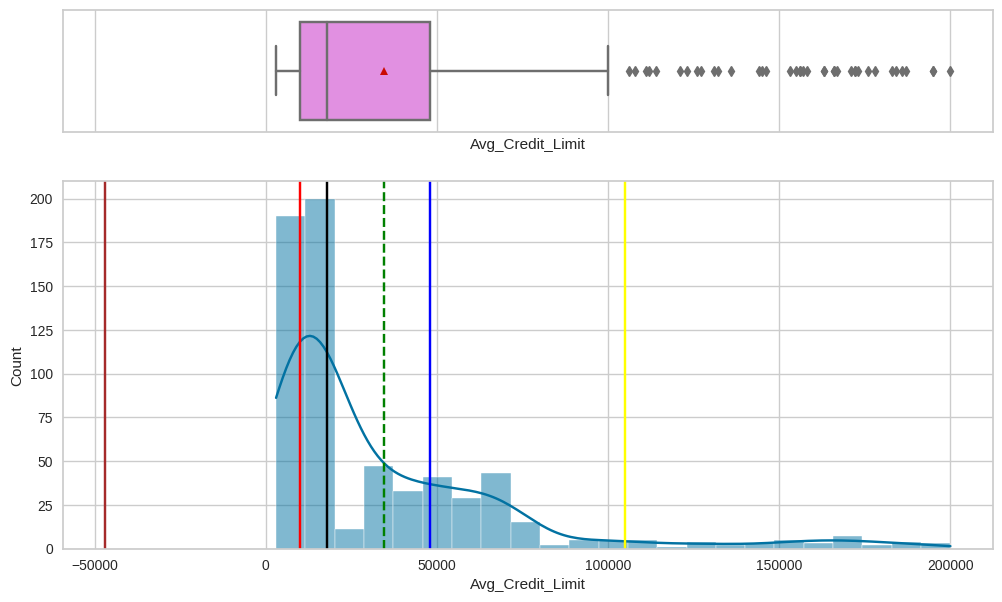

In [22]:
histogram_boxplot(df, "Avg_Credit_Limit", kde=True)

mean1 = df["Avg_Credit_Limit"].mean()
median1 = df["Avg_Credit_Limit"].median()
print("mean: ",mean1," median: ",median1)

lower_range = get_lower_upper(df["Avg_Credit_Limit"], False)
upper_range = get_lower_upper(df["Avg_Credit_Limit"])
print("lower_range: ",lower_range," upper_range: ",upper_range)


### Observations:
* The data distribution of the feature Avg_Credit_Limit is highly right skewed with mean value of 34,574 dollars and median is 18,000 dollars.
* The values that are greater than 105,000 dollars are upper outliers.
* There are few customers with very high avg. credit card limits reaching as high as 200,000. These customers seem to be high earning and high spending customers.


#### Total Credit Cards

mean:  4.706060606060606  median:  5.0


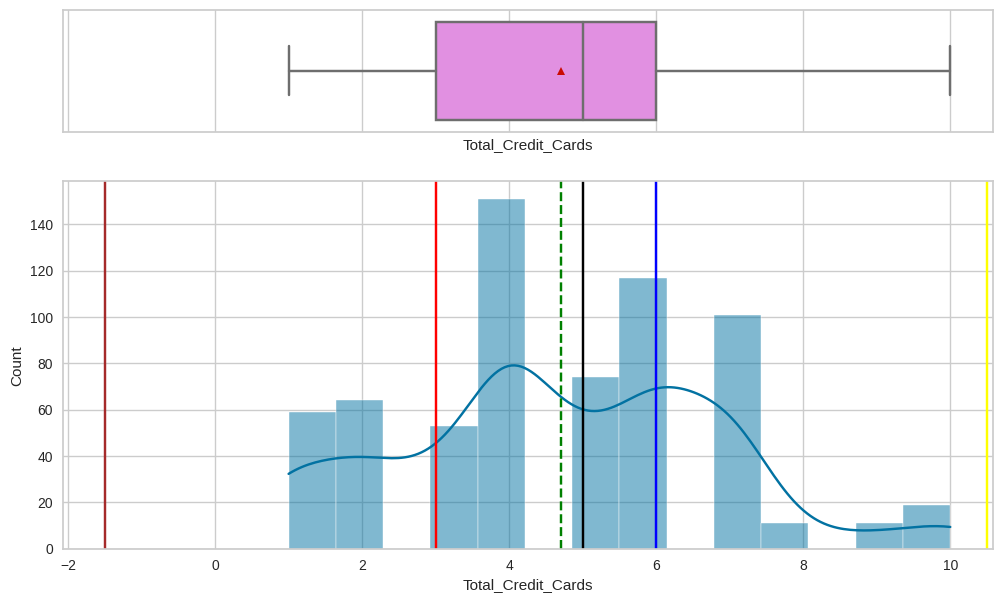

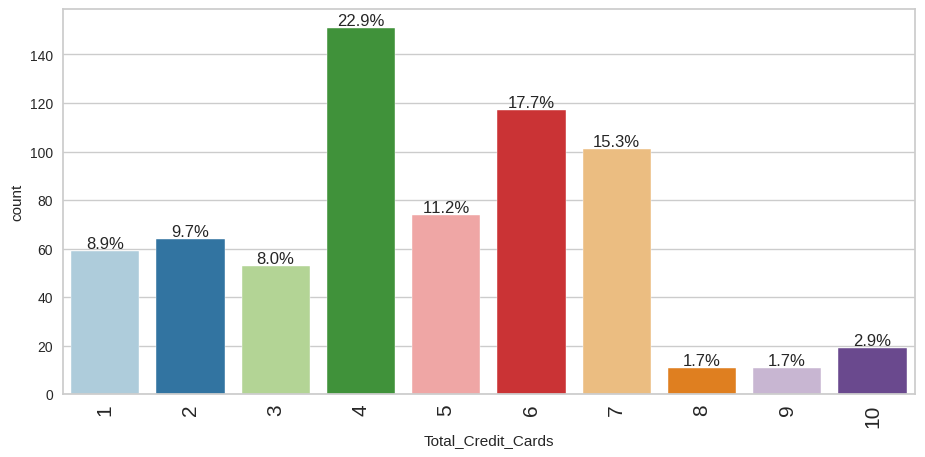

In [23]:
histogram_boxplot(df, "Total_Credit_Cards", kde=True)
labeled_barplot(df, "Total_Credit_Cards", perc=True)

mean1 = df["Total_Credit_Cards"].mean()
median1 = df["Total_Credit_Cards"].median()
print("mean: ",mean1," median: ",median1)

### Observations:
* The total number of credit cards range from 1 to 10.
* The mean number of credit cards is about 5.
* About 23% of customers have 4 credit cards.


#### Total visits bank

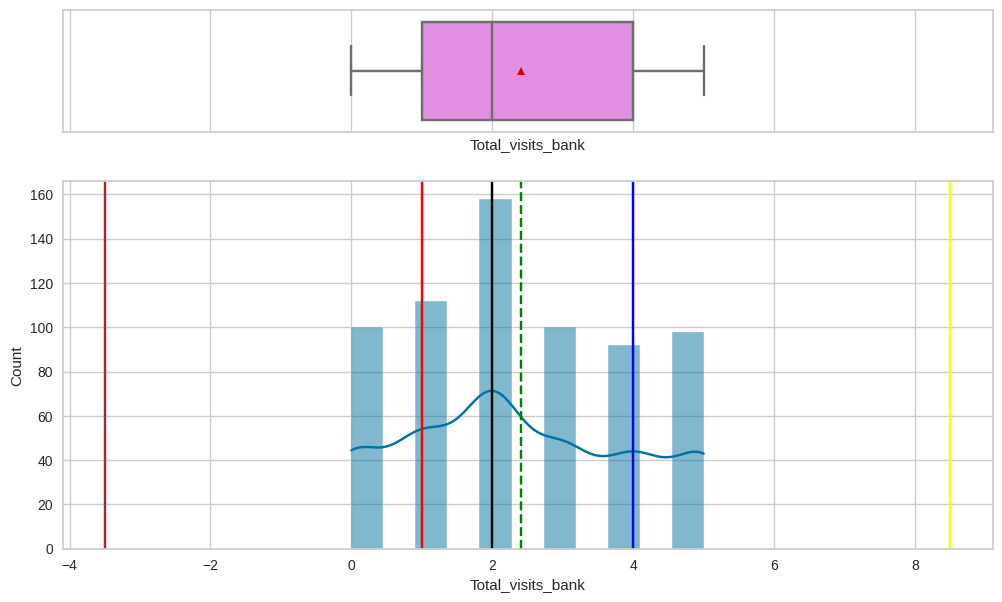

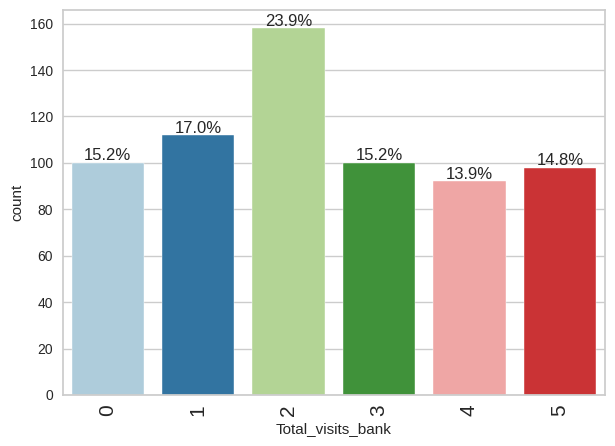

In [24]:
histogram_boxplot(df, "Total_visits_bank", kde=True)
labeled_barplot(df, "Total_visits_bank", perc=True)

#### Total visits online

mean:  2.606060606060606  median:  2.0
lower_range:  -3.5  upper_range:  8.5


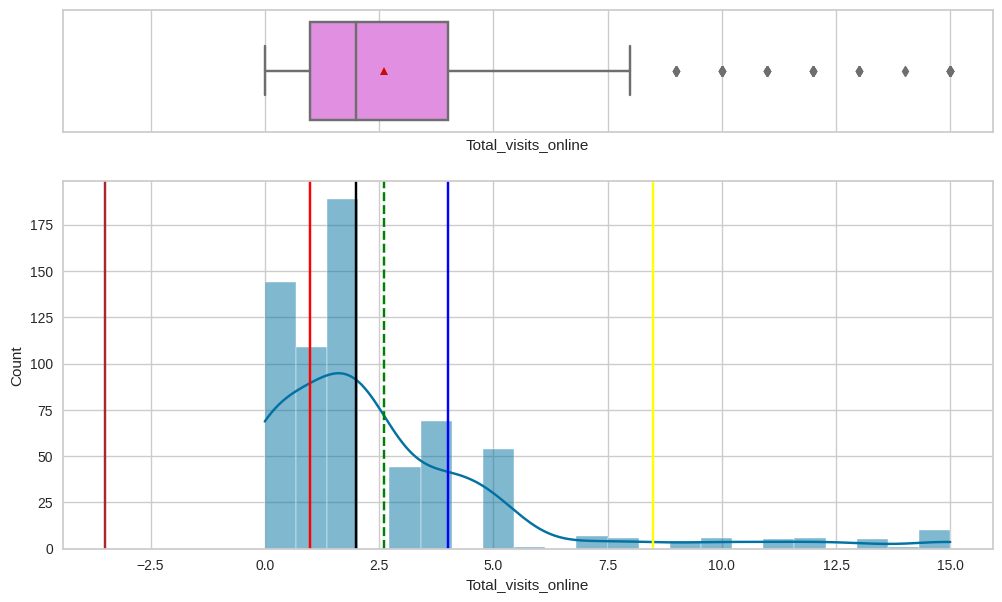

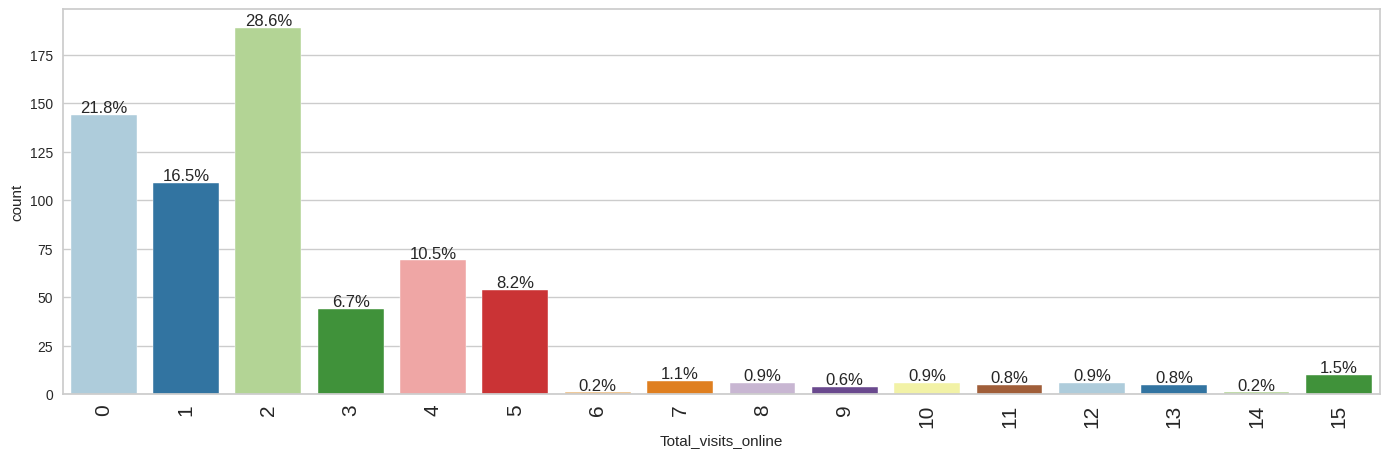

In [25]:
histogram_boxplot(df, "Total_visits_online", kde=True)
labeled_barplot(df, "Total_visits_online", perc=True)

mean1 = df["Total_visits_online"].mean()
median1 = df["Total_visits_online"].median()
print("mean: ",mean1," median: ",median1)

lower_range = get_lower_upper(df["Total_visits_online"], False)
upper_range = get_lower_upper(df["Total_visits_online"])
print("lower_range: ",lower_range," upper_range: ",upper_range)

### Observations:
* The data distribution of the feature Total_visits_online is highly right skewed with mean value of about 3 yearly visits and median is 2 yearly visits.
* The values that are greated than 8 yearly visits are upper outliers.
* There are few customers have visited the online bank portal more than 8 times yearly.
* The highest number of online visits is 15 suggesting that some customers might be using the credit cards more than once a month.


#### Total calls made

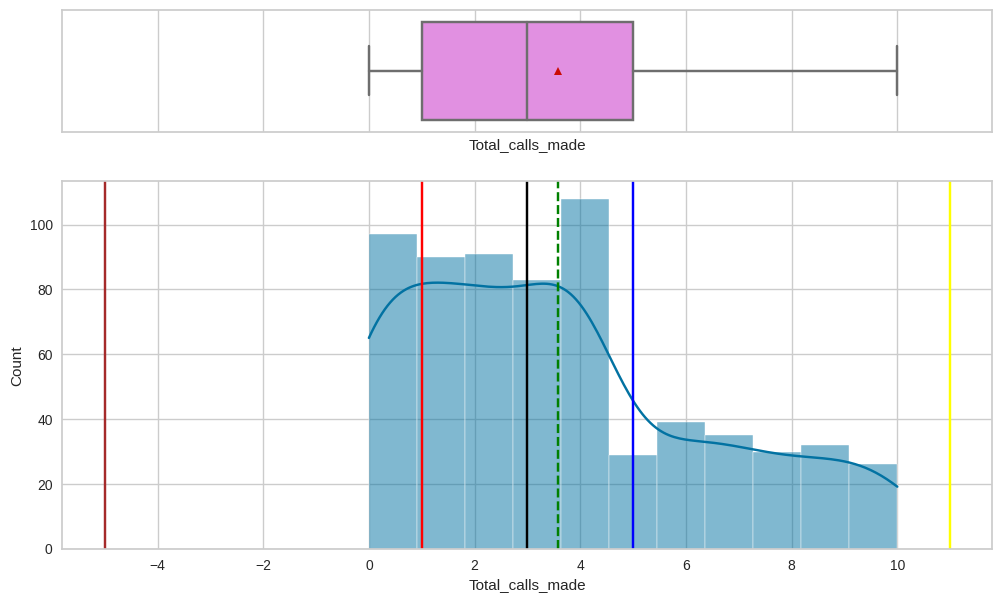

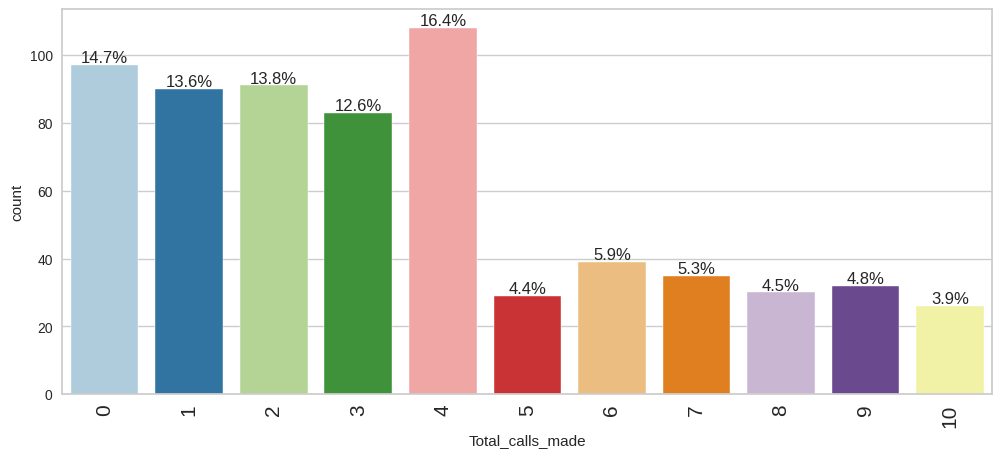

In [26]:
histogram_boxplot(df, "Total_calls_made", kde=True)
labeled_barplot(df, "Total_calls_made", perc=True)

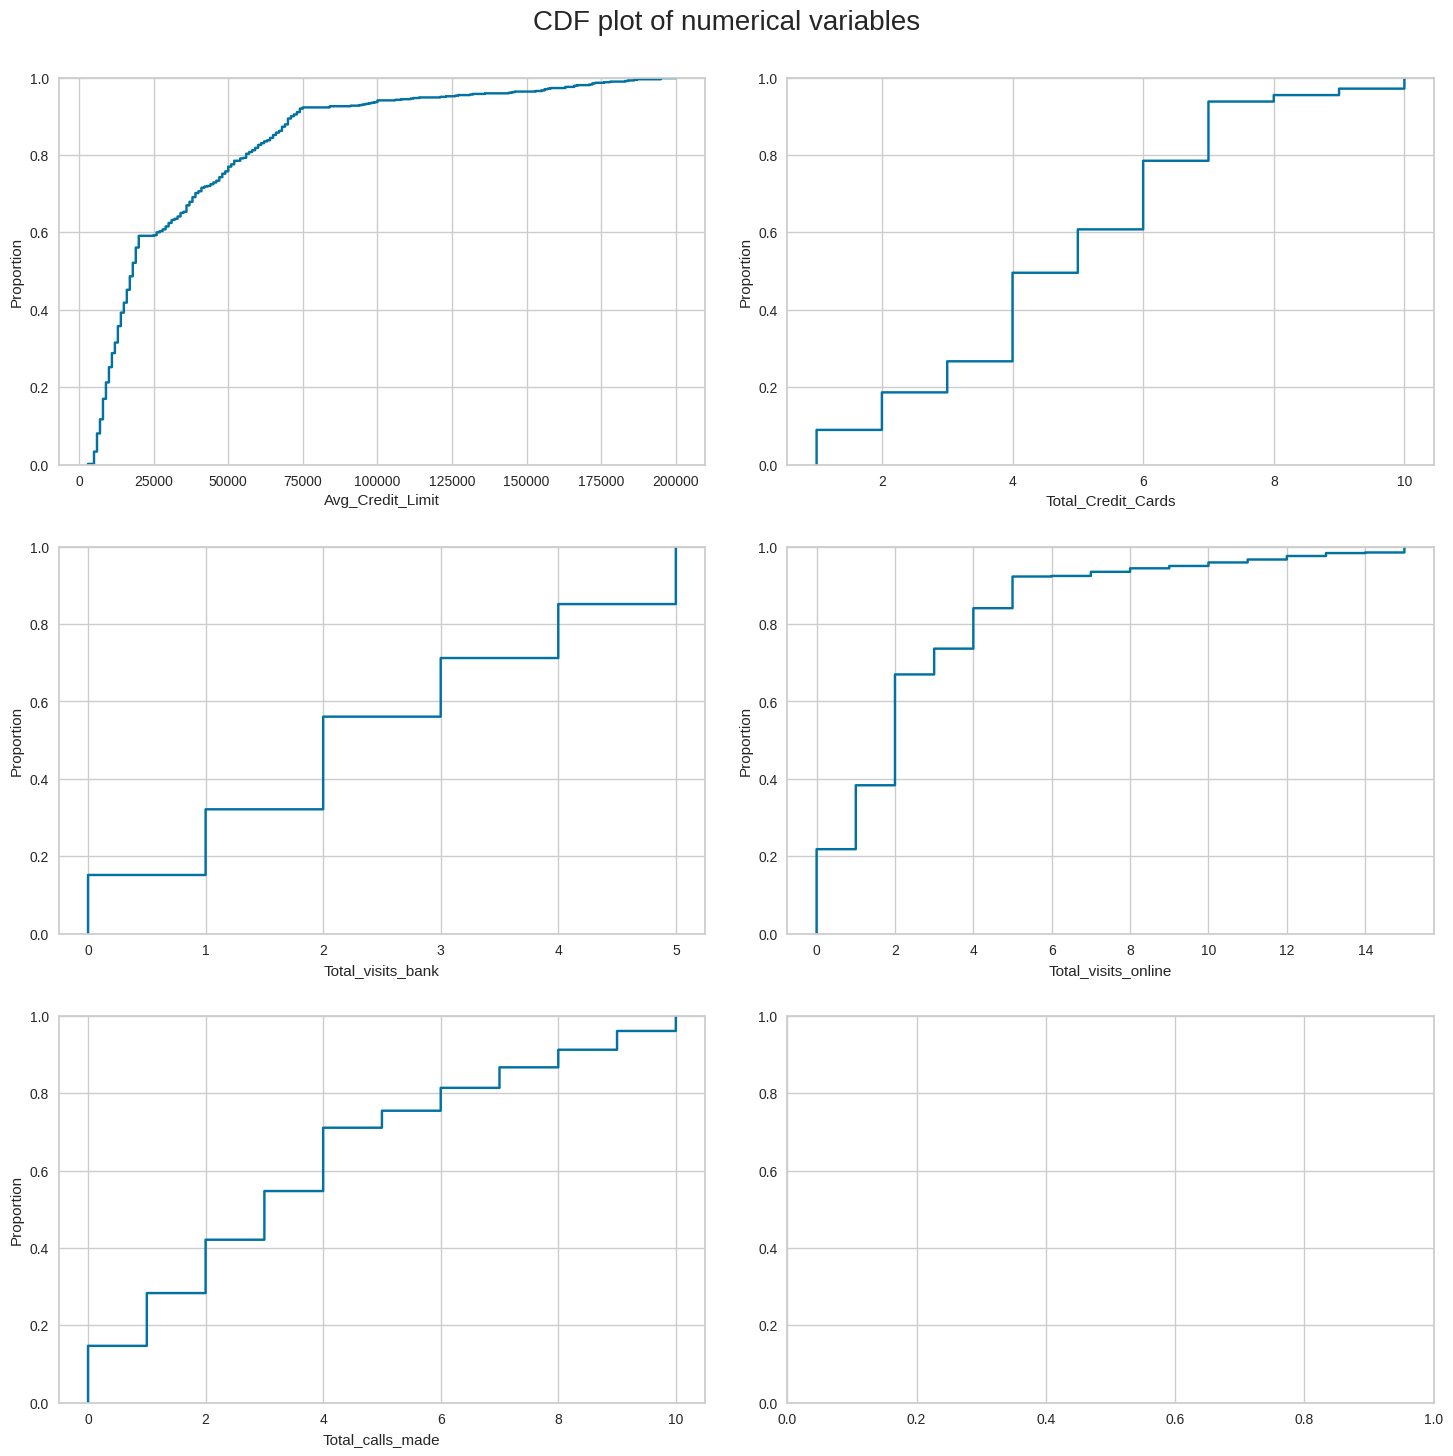

In [27]:
fig, axes = plt.subplots(3, 2, figsize=(15, 15))
fig.suptitle("CDF plot of numerical variables", fontsize=20)

counter = 0

for ii in range(3):
    sns.ecdfplot(data=df, ax=axes[ii][0], x=df.columns.tolist()[counter])
    counter = counter + 1
    if counter != 5:
        sns.ecdfplot(data=df, ax=axes[ii][1], x=df.columns.tolist()[counter])
        counter = counter + 1
    else:
        pass

fig.tight_layout(pad=2.0)

### Bivariate Analysis

#### Correlation between columns with heatmap

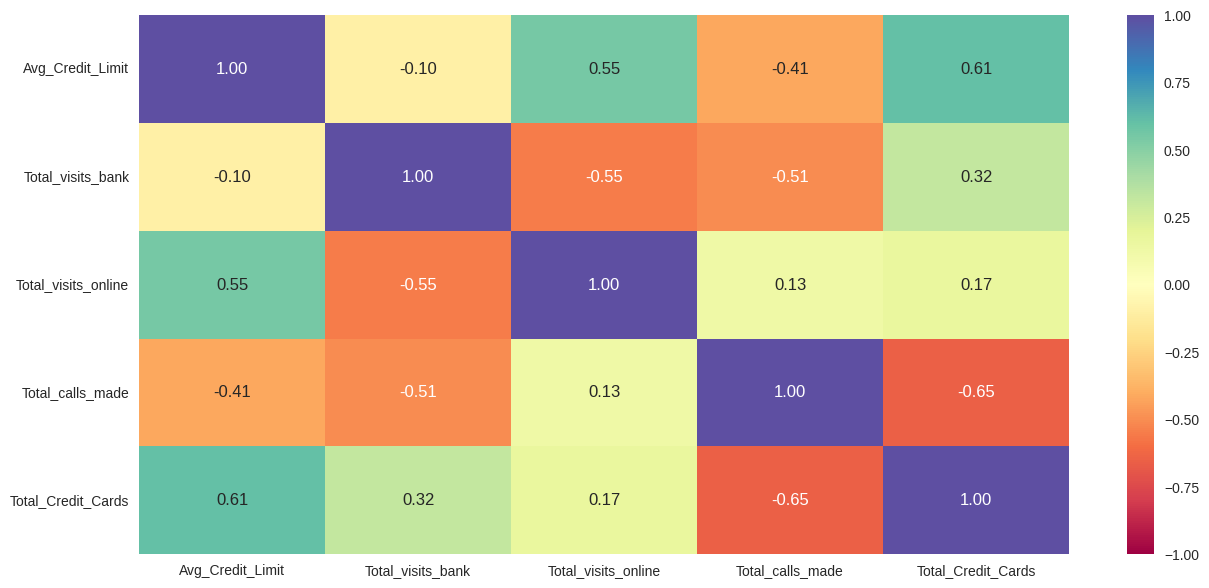

In [28]:
plt.figure(figsize=(15, 7))
vars=['Avg_Credit_Limit', 'Total_visits_bank','Total_visits_online', 'Total_calls_made','Total_Credit_Cards']
sns.heatmap(df[vars].corr(),  annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

<Figure size 2000x2500 with 0 Axes>

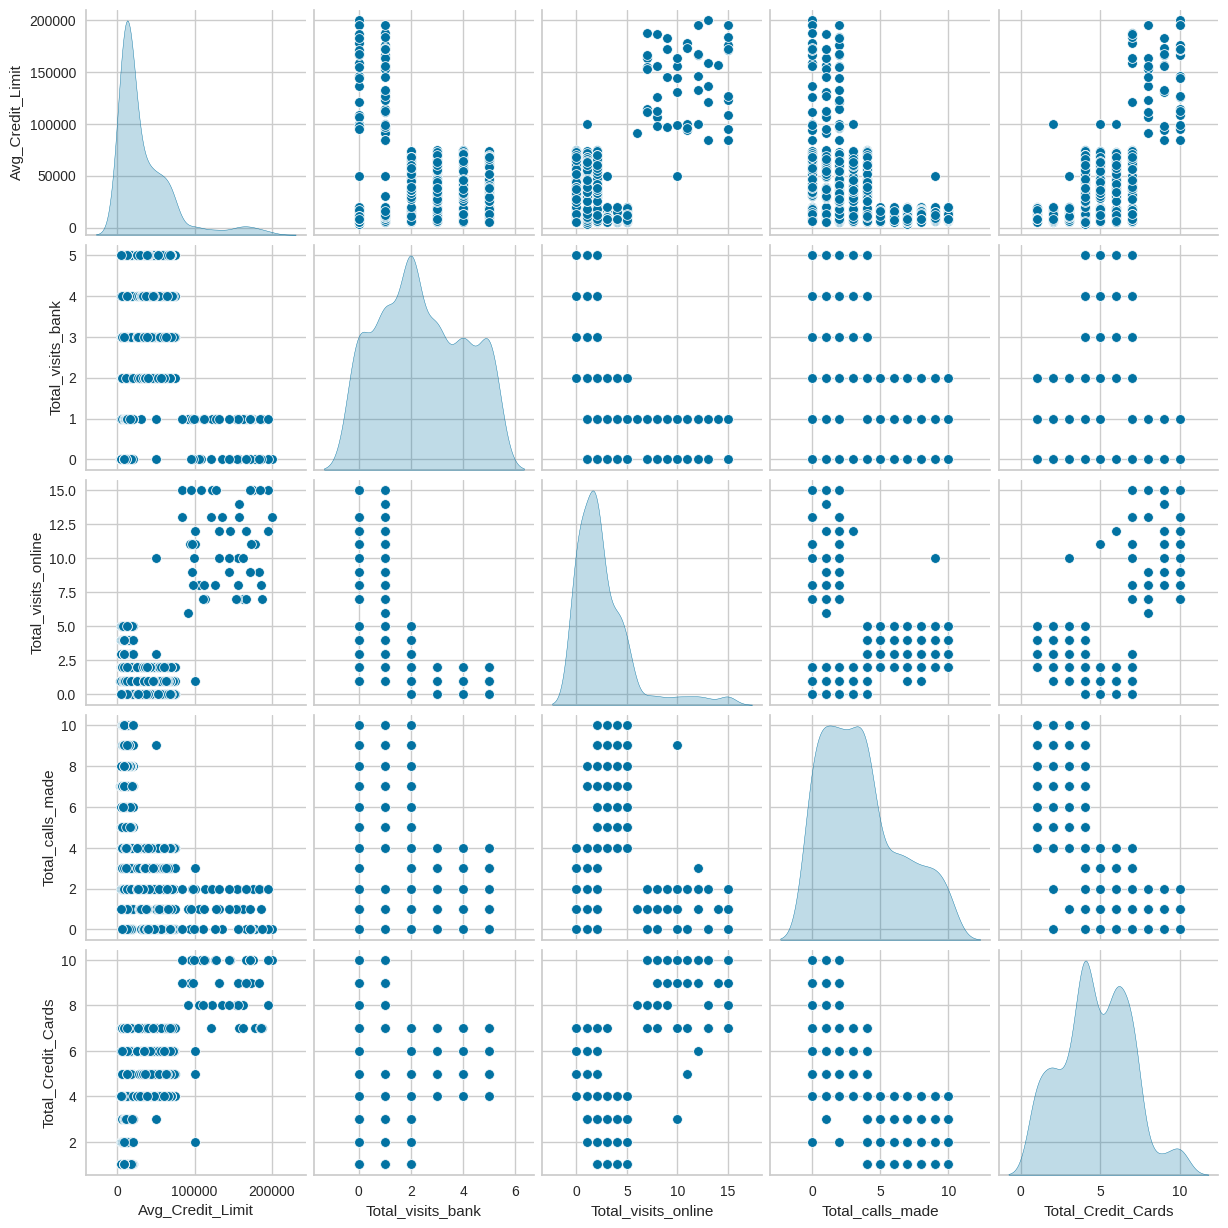

In [29]:
# Pairplot to see the relationships between all the features in the dataset.
plt.figure(figsize=(20, 25))
sns.pairplot(data=df, vars=['Avg_Credit_Limit', 'Total_visits_bank','Total_visits_online', 'Total_calls_made','Total_Credit_Cards'], diag_kind="kde")
plt.show()

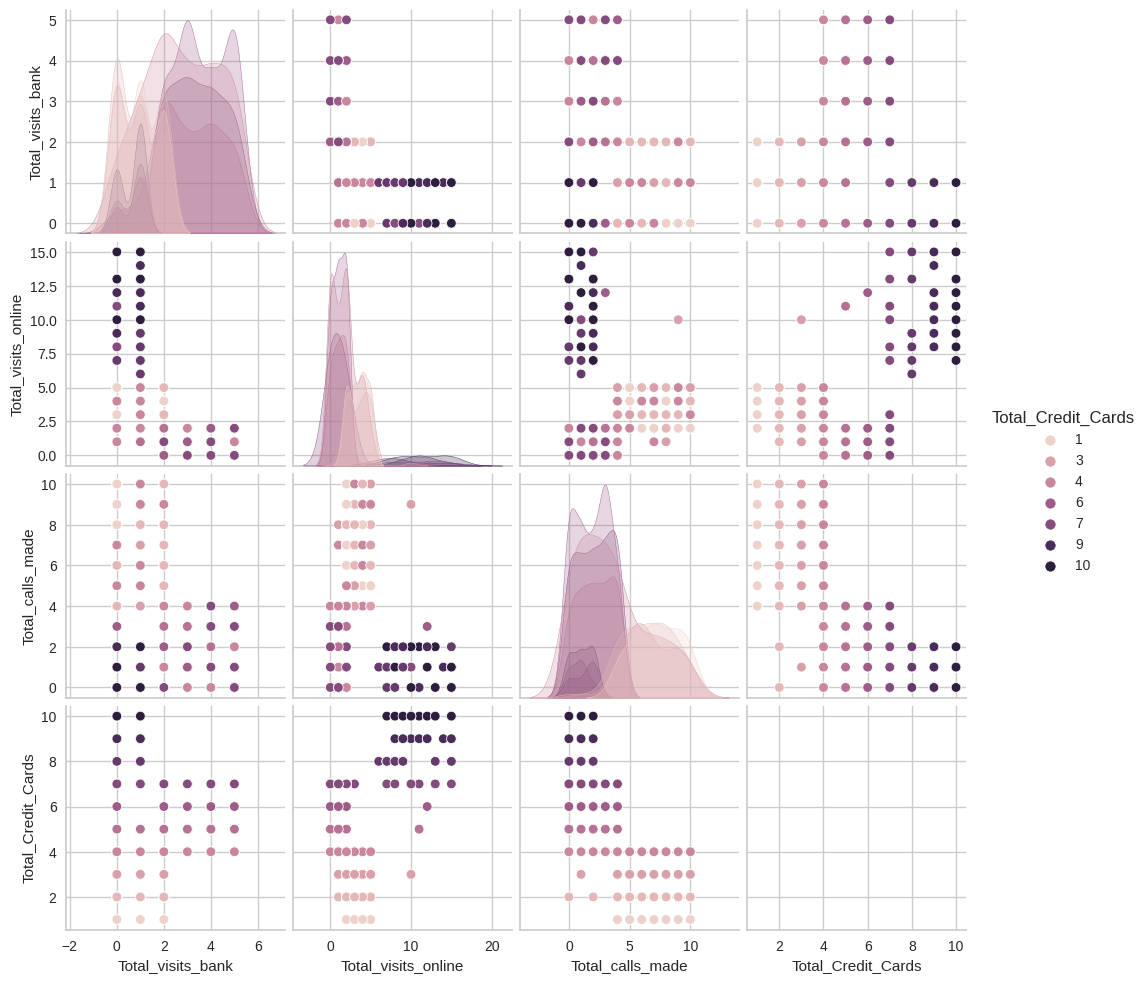

In [30]:
# Pairplot to see the relationships between Total_visits_bank,Total_visits_online, Total_calls_made and Total_Credit_Cards
# with respect to the total number of credit cards each customer has.
sns.pairplot(data=df, vars=['Total_visits_bank','Total_visits_online', 'Total_calls_made','Total_Credit_Cards'], hue='Total_Credit_Cards');
plt.show()

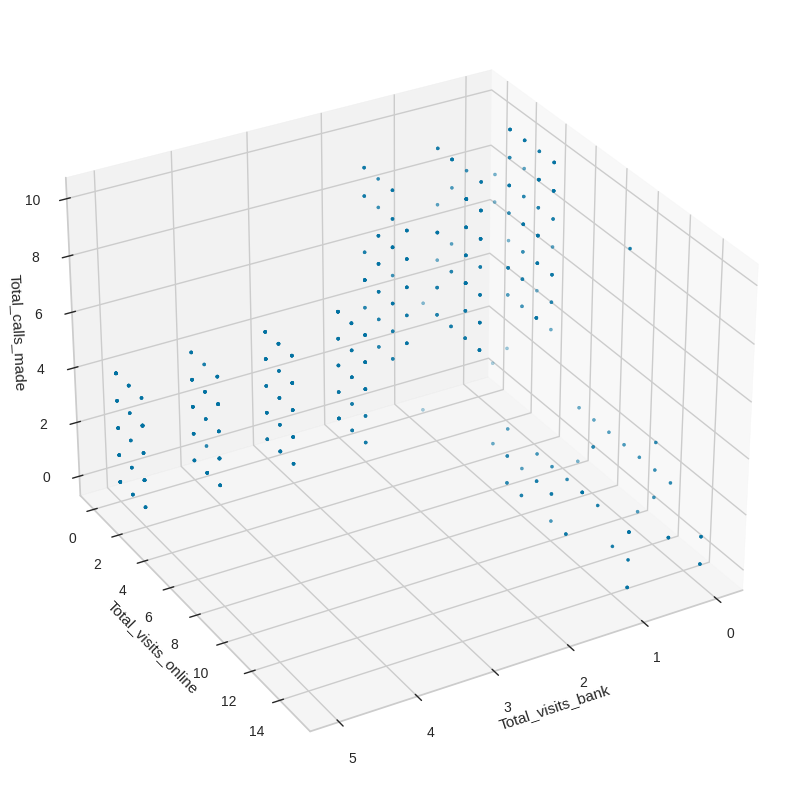

In [31]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection="3d")

x = df["Total_visits_bank"]
y = df["Total_visits_online"]
z = df["Total_calls_made"]


ax.scatter(x, y, z, marker=".")
ax.set_xlabel("Total_visits_bank")
ax.set_ylabel("Total_visits_online")
ax.set_zlabel("Total_calls_made")
ax.view_init(azim=60)
plt.show()

* From the above 3-d mapping, we can see that about 3 clusters can be formed.

### **Questions**:



#### 1. How is the distrubution of average credit limit of customer?

Avg_Credit_Limit mean:  34574.242424242424  median:  18000.0


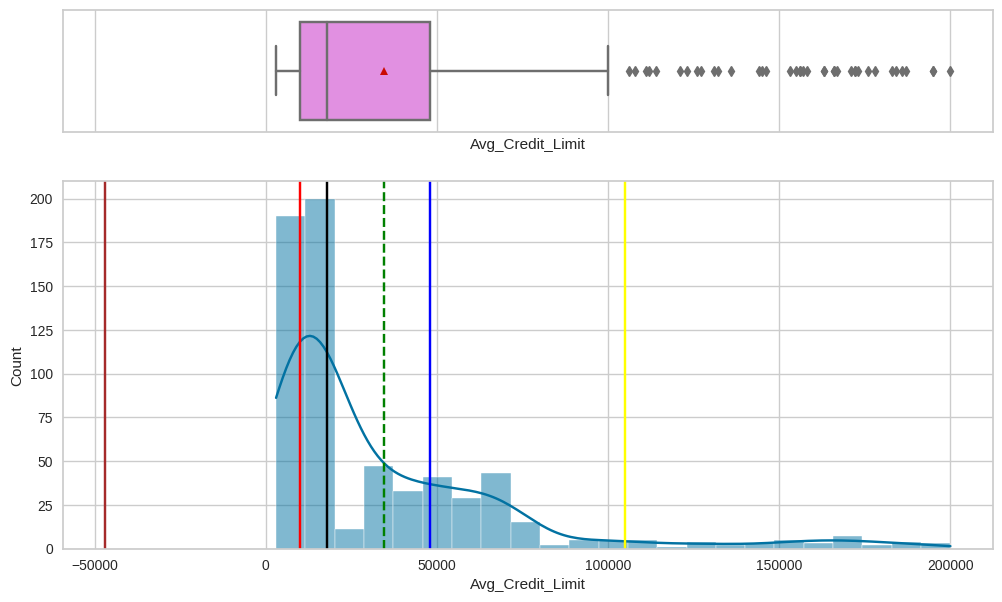

In [32]:
histogram_boxplot(df, "Avg_Credit_Limit", kde=True)

print("Avg_Credit_Limit mean: ",df["Avg_Credit_Limit"].mean()," median: ",df["Avg_Credit_Limit"].median())

### Answer 1:
* The distribution of the Avg_Credit_Limit column is highly right skewed.
* There are upper outliers avg. credit limits of more than 100000 dollars.
* The mean value is about 34574 dollars and the median value is 18000 dollars.

#### 2. What percentage of the customers have never made a service-related call to the bank?

In [33]:
# Get the percentages of customers who made 0 to 10 service-related call to the bank
grp_call = df["Total_calls_made"].value_counts(normalize=True)
grp_call

4     0.163636
0     0.146970
2     0.137879
1     0.136364
3     0.125758
6     0.059091
7     0.053030
9     0.048485
8     0.045455
5     0.043939
10    0.039394
Name: Total_calls_made, dtype: float64

In [34]:
# Get the percentage of only the customers who made 0 to 10 service-related call to the bank
grp_call.loc[grp_call.index==0]

0    0.14697
Name: Total_calls_made, dtype: float64

### Answer 2:
* Looking at the above data, we can see that the percentage of the total customers who have never made a service-related call to the bank are 14.7%.

#### 3. What percentage of customers have never logged in to the online portal?

In [35]:
# Get the percentages of customers who logged into the bank website or app
grp_on = df["Total_visits_online"].value_counts(normalize=True)

# Get the percentage of only the customers who have never logged into the online portal
grp_on.loc[grp_on.index==0]

0    0.218182
Name: Total_visits_online, dtype: float64

### Answer 3:
* Looking at the above data, we can see that the percentage of the total customers who have never logged  in to the online bank portal are 21.82%.

#### 4. How many customers have never visited bank?

In [36]:
# Get the percentages of customers who made visits to the bank
grp_visit = df["Total_visits_bank"].value_counts(normalize=True)

# Get the percentage of only the customers who have made 0 visits to the bank
grp_visit.loc[grp_visit.index==0]

0    0.151515
Name: Total_visits_bank, dtype: float64

### Answer 4:
* Looking at the above data, we can see that the percentage of the total customers who have never visited the bank are 15.16%.

#### 5. How are the different variables correlated with each other?

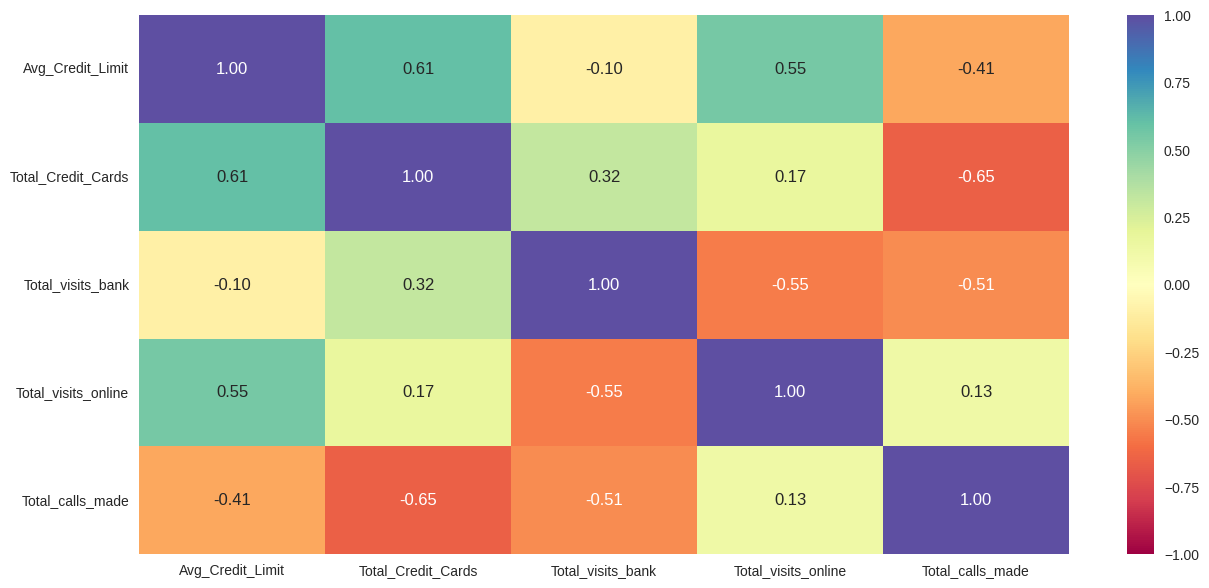

In [37]:
# plot the heatmap that shows the correlations of all the features in the dataset.
plt.figure(figsize=(15, 7))
sns.heatmap(df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

### Answer 5:
* The correlation between the Total_Credit_Cards and the Avg_Credit_Limit features is positive (0.61). This means that if the customers have more number of credit cards, they tend to have higher avg. credit limits.
* Total_visits_bank is positively correlated with the Avg_Credit_Limit (0.55). So, the more number of online visits the customer has made (yearly) to the bank online portal, the more their Avg. credit limit.
* The Total_Credit_Cards is negatively correlated (-0.65) to the Total_calls_made. So, the more number of credit cards that customer has, they have made fewer calls (yearly) to the bank or its customer service dept.
* The Total_visits_bank is negatively correlated(-0.55) to the Total_visits_online. So, the more number of personal bank visits that the customer has made yearly, they have made fewer visits (yearly) to the bank online portal.
* The Total_visits_bank is negatively correlated(-0.51) to the Total_calls_made. So, the more number of personal bank visits that the customer has made yearly, they have made fewer calls (yearly) to the bank or its customer service dept.
* The Avg_Credit_Limit is negatively correlated(-0.41) to the Total_calls_made. So, the more avg. credit limit the customer has for all the credit cards, they have made fewer calls (yearly) to the bank or its customer service dept.

## Data Preprocessing (Continued)

#### **Outlier check**

**Let's find outliers in the data using z-score with a threshold of 3.**


The formula for z-score is:

z = (x-μ) / σ

where, μ is the mean and σ is the standard deviation

For a normal distribution of values of a column, the z-scores must lie in the range of -3 to +3. Any z-score that lies outside of this range can be considered as an outlier. Hence in the below code, we set threshold as 3.


In [38]:
threshold = 3 # wite the value of the threshold
outlier = {}
for col in df.columns:
    i = df[col]
    mean = np.mean(df[col])
    std = np.std(df[col])
    list1 = []
    for v in i:
        z = (v - mean) / std
        if z > threshold:
            list1.append(v)
    list1.sort()
    outlier[i.name] = list1

print("The following are the outliers in the data:")
for key, value in outlier.items():
    print("\n", key, ":", value)

The following are the outliers in the data:

 Avg_Credit_Limit : [153000, 155000, 156000, 156000, 157000, 158000, 163000, 163000, 166000, 166000, 167000, 171000, 172000, 172000, 173000, 176000, 178000, 183000, 184000, 186000, 187000, 195000, 195000, 200000]

 Total_Credit_Cards : []

 Total_visits_bank : []

 Total_visits_online : [12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]

 Total_calls_made : []



* Also, from the above pairplot in the Bivariate section, we see that there are upper range outliers for the features Avg_Credit_Limit and Total_visits_online.
* The above code also confirms the same using the z-score calculations for the features Avg_Credit_Limit and Total_visits_online. The z-scores that lie outside the normal range of -3 and +3 are considered outliers.

**After identifying outliers, we can decide whether to remove/treat them or not. It depends on one's approach, here we are not going to treat them as there will be outliers in real case scenario. There might be customers who are higher earners and might be high spenders, the might be more tech savvy and use online portals more than visiting the bank or calling the bank, etc., and we would want our model to learn the underlying pattern for such customers.**

#### Feature engineering (if needed)

#### **Scaling**

In [39]:
# scaling the dataset before clustering
scaler = StandardScaler()
scaled = df.copy()
scaled_2 = scaler.fit_transform(scaled)

In [40]:
# creating a dataframe of the scaled columns
scaled_df = pd.DataFrame(scaled_2, columns=scaled.columns)

#### Any other preprocessing steps (if needed)

* **All the columns in the dataset are numerical and none are categorical columns. So, other than scaling the columns, we do not need any category column encoding in this analysis.**

## EDA

- It is a good idea to explore the data once again after manipulating it.

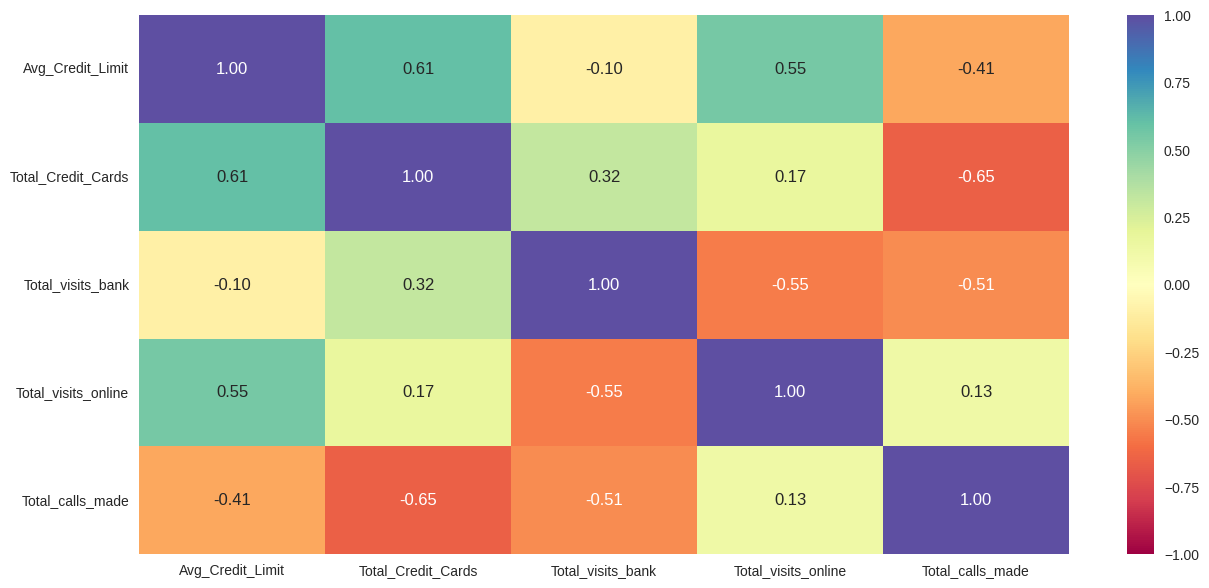

In [41]:
plt.figure(figsize=(15, 7))
sns.heatmap(scaled_df.corr(),  annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

* The correlation between the features in the scaled dataset seems to match the pre-scaled dataset.

## K-means Clustering

In [42]:
# Let us make a copy of the scaled dataset before K-means
k_means_df = scaled_df.copy()

Number of Clusters: 2 	Average Distortion: 1.4571553548514269
Number of Clusters: 3 	Average Distortion: 1.1466276549150365
Number of Clusters: 4 	Average Distortion: 1.0463825294774465
Number of Clusters: 5 	Average Distortion: 0.9908683849620168
Number of Clusters: 6 	Average Distortion: 0.9426543606899347
Number of Clusters: 7 	Average Distortion: 0.9093991915419353
Number of Clusters: 8 	Average Distortion: 0.8843243844476886
Number of Clusters: 9 	Average Distortion: 0.8650832420580971
Number of Clusters: 10 	Average Distortion: 0.8411372125672628


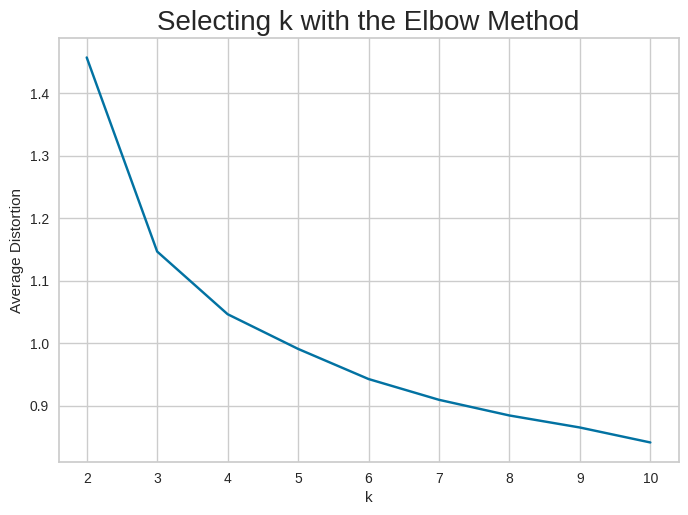

In [43]:
# Let us choose the range of the number of clusters for KMeans. The min. number of clusters must be 2.
# So, in this case, we can choose the range of clusters as 2 to 11.
# Run the below code to get the centroids, calculate the Euclidian distance between the datapoints and the centroid.
# You can then plot the

clusters = range(2, 11)
meanDistortions = [] # Create a empty list

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1) # Initialize KMeans
    model.fit(scaled_df) # Fit kMeans on the data
    prediction = model.predict(k_means_df) # Predict the model on the data
    distortion = (
        sum(
            np.min(cdist(scaled_df, model.cluster_centers_, "euclidean"), axis=1)
        )
        / scaled_df.shape[0]
    ) # Find distortion

    meanDistortions.append(distortion) # Append distortion values to the empty list meanDistortions

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average Distortion")
plt.title("Selecting k with the Elbow Method", fontsize=20)
plt.show()

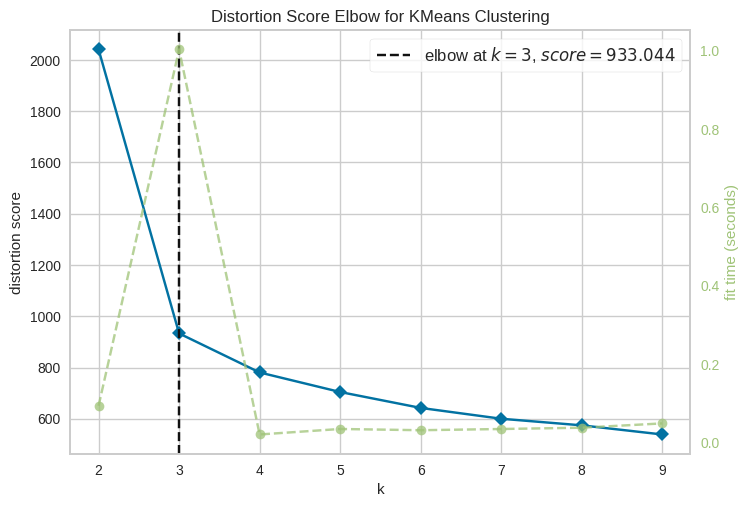

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [44]:
model = KMeans(random_state = 1)
visualizer = KElbowVisualizer(model, k=(2, 10), timings=True)
visualizer.fit(k_means_df) # fit the data to the visualizer
visualizer.show()  # finalize and render figure

## **Let's check the silhouette scores**

In [45]:
sil_score = []
cluster_list = range(2,10)
for n_clusters in cluster_list:
  clusterer = KMeans(n_clusters = n_clusters, random_state = 1)
  preds = clusterer.fit_predict((scaled_df))
  score = silhouette_score(k_means_df, preds)
  sil_score.append(score)
  print("For n_clusters = {}, the silhouette score is {})".format(n_clusters, score))

For n_clusters = 2, the silhouette score is 0.41842496663215445)
For n_clusters = 3, the silhouette score is 0.5157182558881063)
For n_clusters = 4, the silhouette score is 0.3556670619372605)
For n_clusters = 5, the silhouette score is 0.2717470361089752)
For n_clusters = 6, the silhouette score is 0.255906765297388)
For n_clusters = 7, the silhouette score is 0.24798644656011146)
For n_clusters = 8, the silhouette score is 0.2414240144760896)
For n_clusters = 9, the silhouette score is 0.2184645050755029)


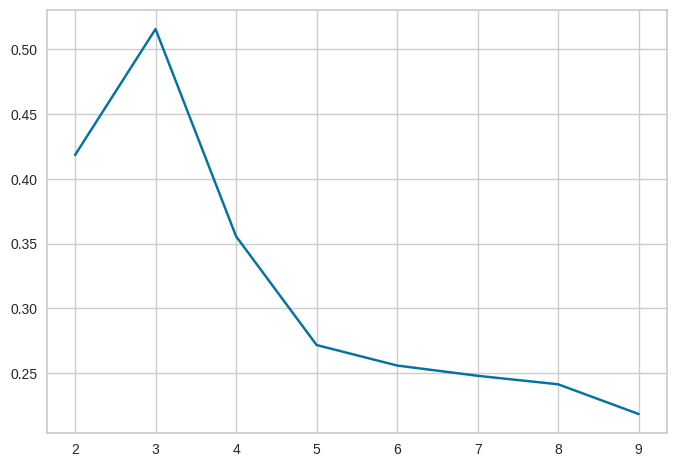

In [46]:
# plot silhouette scores
plt.plot(cluster_list, sil_score)
plt.show()

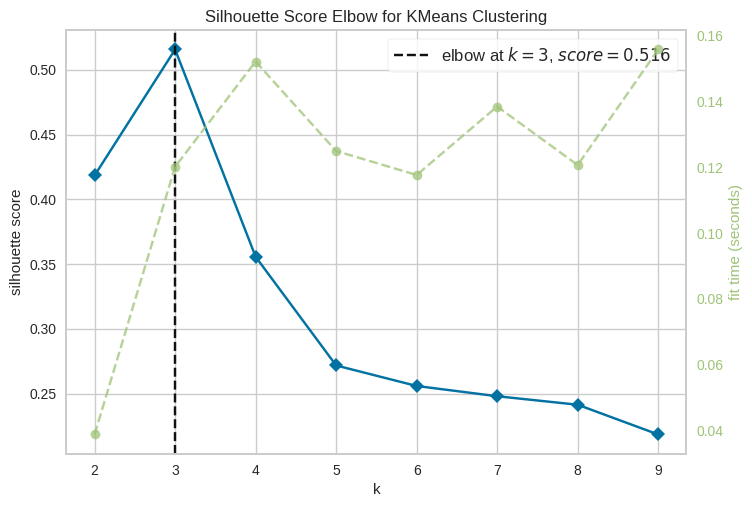

<Axes: title={'center': 'Silhouette Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='silhouette score'>

In [47]:
## code to visualize the elbow plot of the silhouette scores for k = 2 to 10 clusters
model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2, 10), metric="silhouette", timings=True)
visualizer.fit(k_means_df)  # fit the data to the visualizer
visualizer.show()  # finalize and render figure

* Looking at the Elbow plot the appropriate value for k seems to be 3 or 4.
* But looking at the above plots of the silhouette scores, the silhouette score of 3 is highest.
* The fit time taken is lesser when k = 3 clusters and highest when k = 4 clusters.
* **So, we will choose 3 as value of k.**

## Let's visualize the silhouette scores for k = 3 and 4

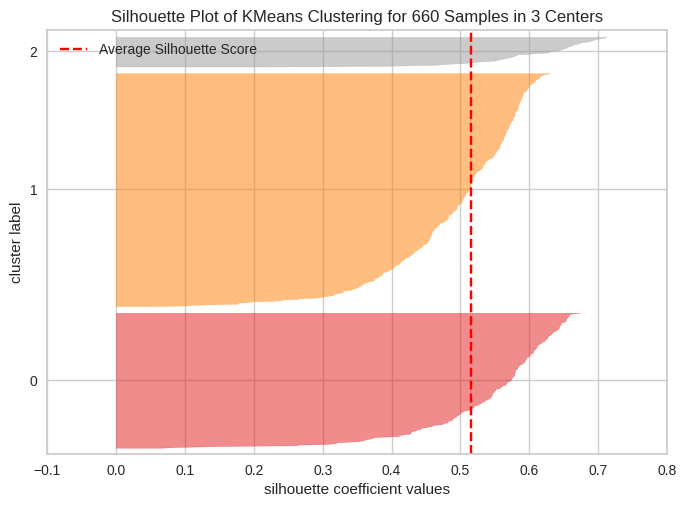

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [48]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

In [49]:
#Run this code to see how the data is distributed in each clusters if k = 3 or number of cluster is 3
clusterer = KMeans(n_clusters = 3, random_state = 1)
preds = clusterer.fit_predict((scaled_df))
preds

array([1, 0, 1, 1, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

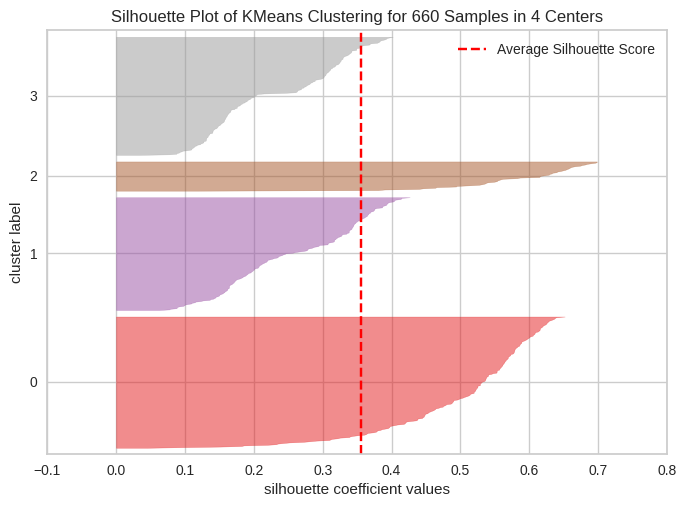

<Axes: title={'center': 'Silhouette Plot of KMeans Clustering for 660 Samples in 4 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>

In [50]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))  ## Complete the code to visualize the silhouette scores for certain number of clusters
visualizer.fit(k_means_df)
visualizer.show()

In [51]:
#Run this code to see how the data is distributed in each clusters if k = 4 or number of cluster is 4
clusterer = KMeans(n_clusters = 4, random_state = 1)
preds = clusterer.fit_predict((scaled_df))
preds

array([3, 0, 3, 3, 2, 0, 2, 3, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 1, 3, 1, 3, 1, 1, 1, 1, 3, 3, 3, 1,
       3, 1, 3, 3, 1, 3, 1, 1, 3, 3, 1, 3, 3, 1, 3, 1, 3, 1, 1, 3, 1, 3,
       1, 1, 1, 1, 1, 1, 1, 3, 3, 1, 1, 3, 1, 1, 1, 1, 1, 3, 3, 3, 3, 1,
       1, 3, 3, 1, 3, 3, 3, 3, 1, 1, 1, 1, 1, 1, 1,

### Observations:
* We can observe from the Sihouette visualizer plots for 3 and 4 clusters that the plot with 3 clusters have better data distribution vs the one with 4 clusters.
* **So, we can conclude that 3 clusters is a better option and has best silhouette score.**

### **Creating Final Model**

In [52]:
#Create KMeans with 3 clusters
%%time
kmeans = KMeans(n_clusters=3, random_state=1)
kmeans.fit(k_means_df)

CPU times: user 31.8 ms, sys: 187 µs, total: 32 ms
Wall time: 17.7 ms


KMeans(n_clusters=3, random_state=1)

* The total time taken to fit the KMeans cluster with n_clusters = 3 is 29ms

In [53]:
# creating a copy of the original data
df3 = df.copy()

# adding kmeans cluster labels to the original and scaled dataframes
k_means_df["K_means_segments"] = kmeans.labels_ #copy of scaled dataframe
df3["K_means_segments"] = kmeans.labels_ #copy of original dataframe

## Hierarchical Clustering

In [54]:
#Let us make a copy of the scaled dataset first
hc_df = scaled_df.copy()

In [55]:
# Let us find the Cophenetic correlation for the below distance and linkage combinations
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hc_df, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hc_df))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        #If the Cophenetic correlation is greater than the previous Cophenetic correlations, then
        # update the value of high_cophenet_corr to store the highest Cophenetic correlation value.
        # Also store the corresponding  distance type and the linkage type in the high_dm_lm list
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm


Cophenetic correlation for Euclidean distance and single linkage is 0.7391220243806552.
Cophenetic correlation for Euclidean distance and complete linkage is 0.8599730607972423.
Cophenetic correlation for Euclidean distance and average linkage is 0.8977080867389372.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8861746814895477.
Cophenetic correlation for Chebyshev distance and single linkage is 0.7382354769296767.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.8533474836336782.
Cophenetic correlation for Chebyshev distance and average linkage is 0.8974159511838106.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.8913624010768603.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.7058064784553605.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.6663534463875359.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.8326994115042136.
Cophenetic co

In [56]:
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Highest cophenetic correlation is 0.8977080867389372, which is obtained with Euclidean distance and average linkage.


**Let's explore different linkage methods with Euclidean distance only.**

In [57]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]

for lm in linkage_methods:
    Z = linkage(hc_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hc_df))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

Cophenetic correlation for single linkage is 0.7391220243806552.
Cophenetic correlation for complete linkage is 0.8599730607972423.
Cophenetic correlation for average linkage is 0.8977080867389372.
Cophenetic correlation for centroid linkage is 0.8939385846326323.
Cophenetic correlation for ward linkage is 0.7415156284827493.
Cophenetic correlation for weighted linkage is 0.8861746814895477.


**We see that the cophenetic correlation is maximum with Euclidean distance and average linkage.**

**Let's see the dendrograms for the different linkage methods.**

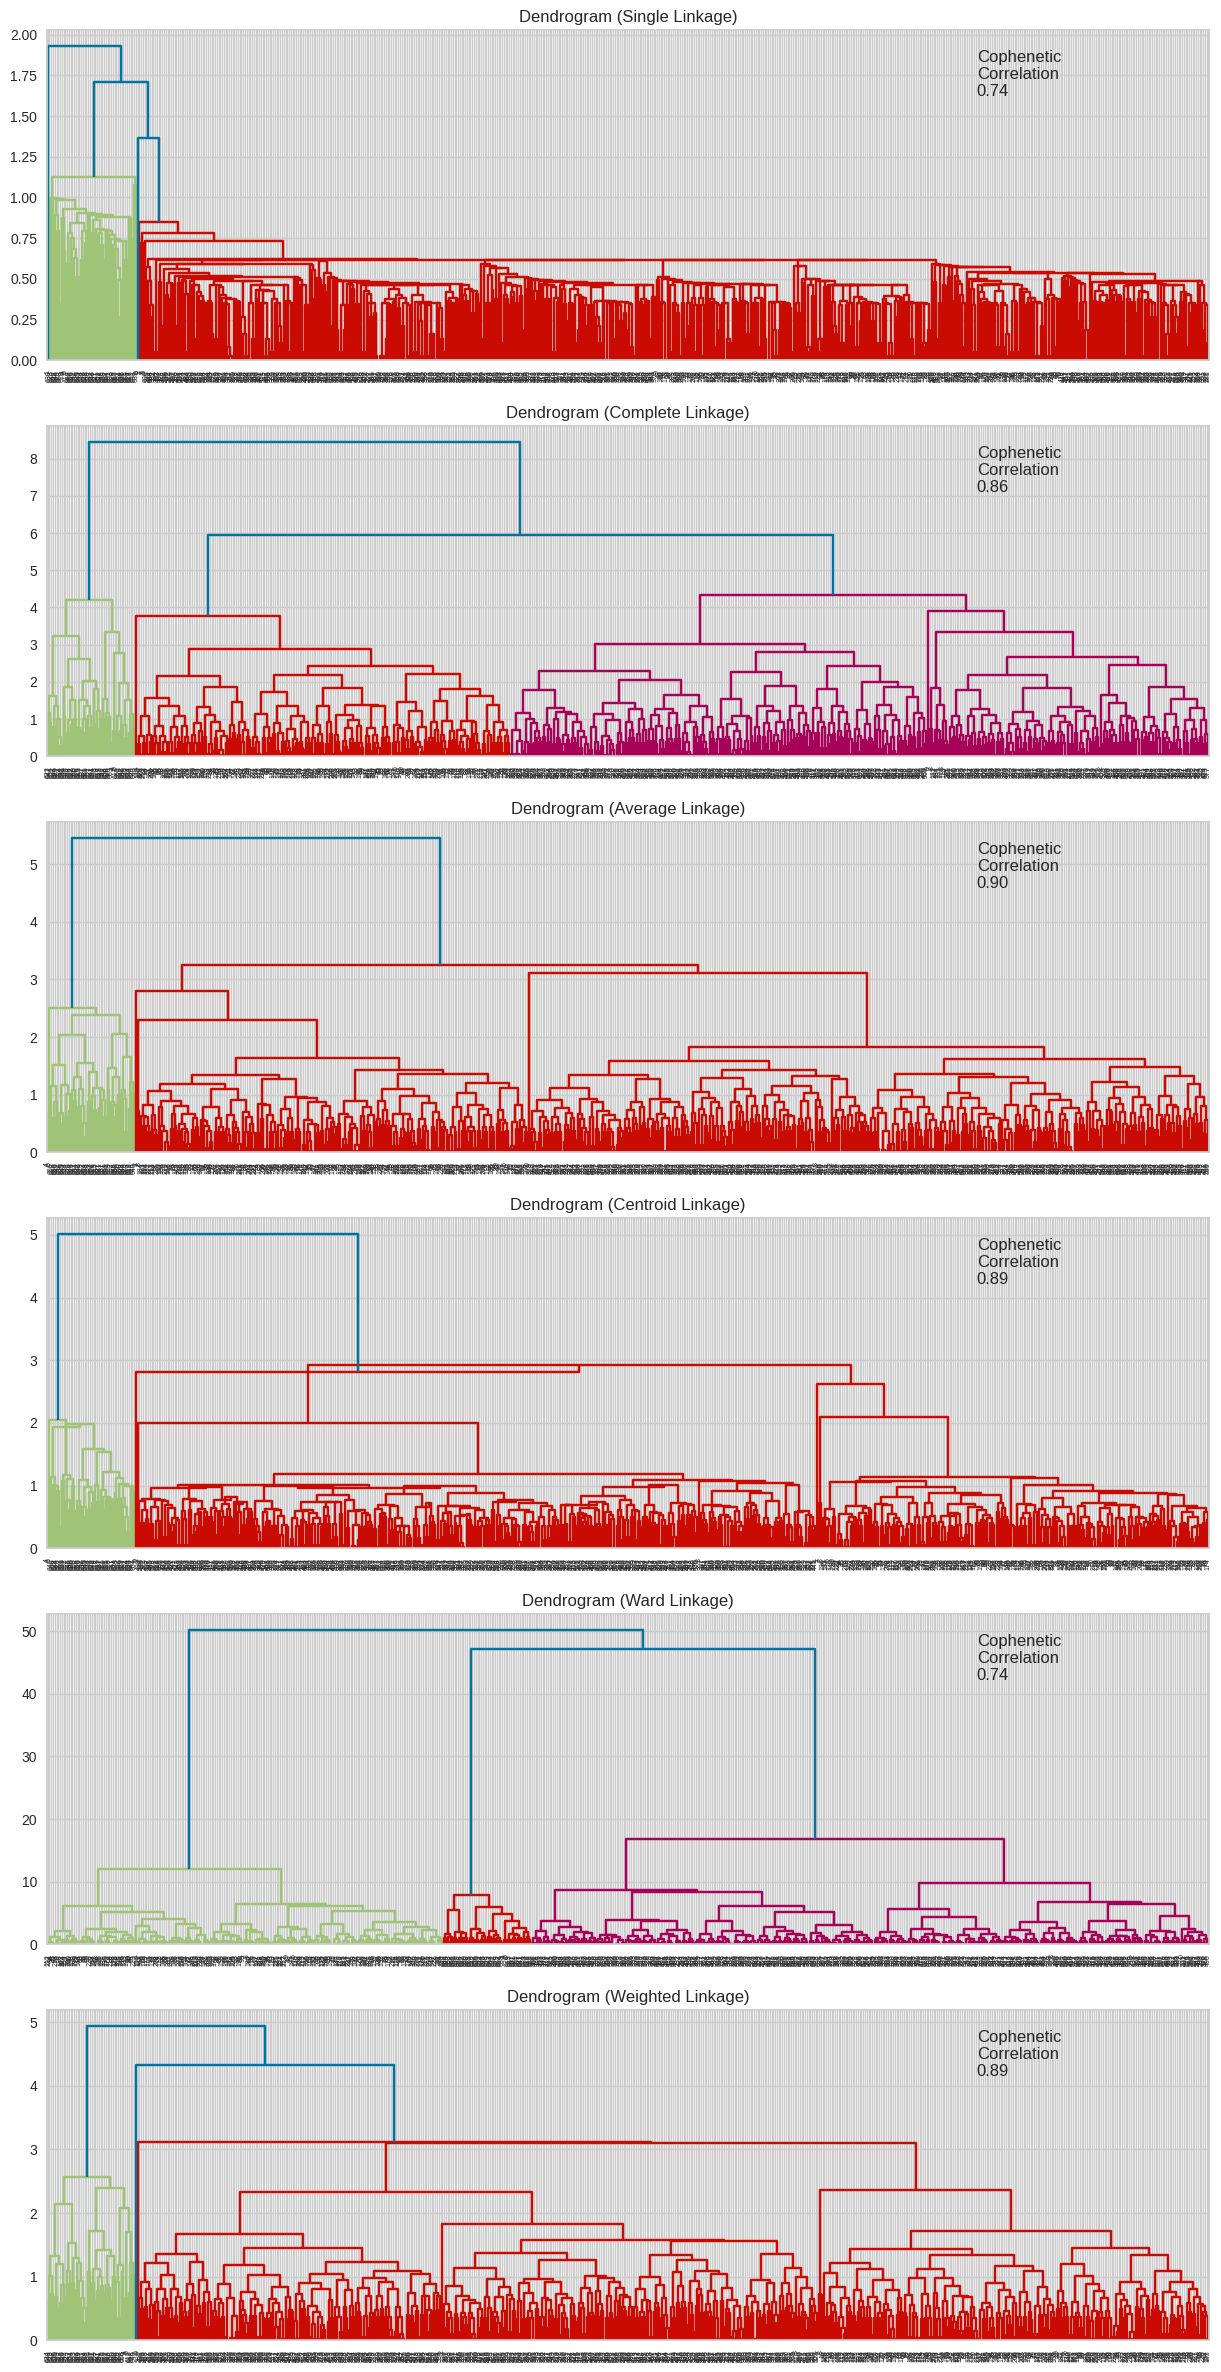

In [58]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]
compare = []

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 30))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(scaled_df))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
    compare.append([method, coph_corr])

**Observations**

- The cophenetic correlation is highest for average, centroid and weighted linkage methods.
- We will move ahead with Average linkage.
- 3 appears to be the appropriate number of clusters from the dendrogram for Average linkage.

### **Dendrogram with average linkage shows distinct and separate cluster tree.**

In [59]:
# create and print a dataframe to compare cophenetic correlations for different linkage methods
df_cc = pd.DataFrame(compare, columns=compare_cols)
df_cc = df_cc.sort_values(by="Cophenetic Coefficient")
df_cc

,Linkage,Cophenetic Coefficient
0,single,0.739122
4,ward,0.741516
1,complete,0.859973
5,weighted,0.886175
3,centroid,0.893939
2,average,0.897708


**Lets visualize the dendrogram cut for average link in the below plot**

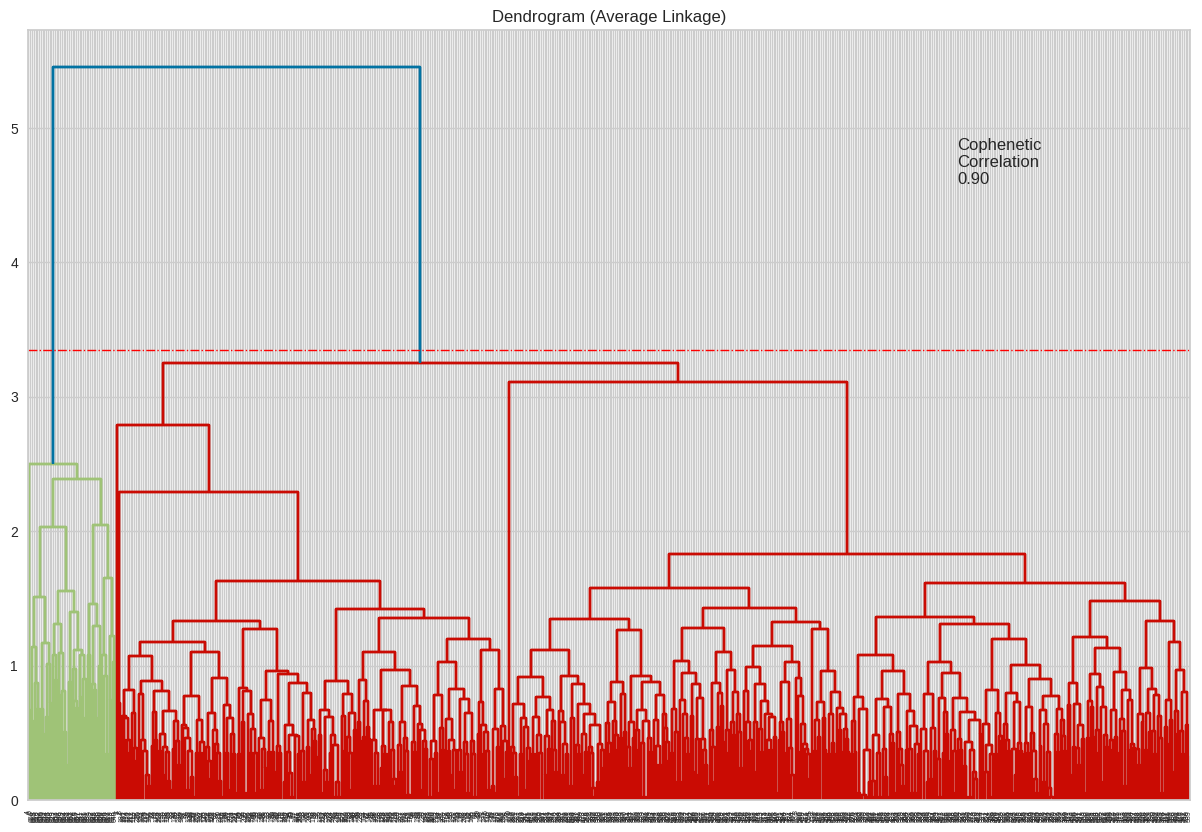

In [60]:
# list of linkage methods
linkage_methods = ["average"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(15, 10))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(scaled_df, metric="euclidean", method=method)

    dendrogram(Z, ax=axs)
    axs.set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(scaled_df))
    axs.annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )
dendrogram(Z, color_threshold=3.35)
plt.axhline(y=3.35, c="red", lw=1, linestyle="dashdot")

#### **Let us check the data distribution in the 4 clusters**

In [61]:
# Create Hierarchical clustering with n_clusters=4 with Euclidean distance and Average linkage.
%%time
HCmodel4 = AgglomerativeClustering(n_clusters=4, affinity="euclidean", linkage="average")
HCmodel4.fit(scaled_df)

CPU times: user 17.8 ms, sys: 0 ns, total: 17.8 ms
Wall time: 17.8 ms


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=4)

* The total time taken to fit the Hierarchical cluster with n_clusters = 4 with Euclidean distance and Average linkage is 17.4 ms

In [62]:
# Let us check the data distributions in each of the 4 clusters
hc4_df = hc_df.copy()
hc4_df["HC_segments"] = HCmodel4.labels_

hc4_df["HC_segments"].value_counts()

2    386
0    223
1     50
3      1
Name: HC_segments, dtype: int64

#### **Let us check the data distribution in the 3 clusters**

In [63]:
# Create Hierarchical clustering with n_clusters=3 with Euclidean distance and Average linkage.
%%time
HCmodel3 = AgglomerativeClustering(n_clusters=3, affinity="euclidean", linkage="average")
HCmodel3.fit(scaled_df)

CPU times: user 16.5 ms, sys: 973 µs, total: 17.5 ms
Wall time: 17.6 ms


AgglomerativeClustering(affinity='euclidean', linkage='average', n_clusters=3)

* The total time taken to fit the Hierarchical cluster with n_clusters = 3 with Euclidean distance and Average linkage is 17.2 ms

In [64]:
# Let us check the data distributions in each of the 3 clusters
hc3_df = hc_df.copy()
hc3_df["HC_segments"] = HCmodel3.labels_

hc3_df["HC_segments"].value_counts()

0    387
2    223
1     50
Name: HC_segments, dtype: int64

### Observations:
* In the above sections, we check the data distributions for Hierarchical clustering for n_clusters = 3 and 4.
* If there are 4 clusters, the data distribution is not uniform.There is 1 cluster with only 1 observation in it. The other 3 clusters have better distributions.
* If there are 3 clusters, the data distribution is good is somewhat uniform in 3 clusters, when compared to when n_clusters =4.
* **So, we will choose 3 clusters (n_clusters = 3) for final hierarchical model.**

## **Creating Final Model**

In [65]:
# creating a copy of the original data
df4 = df.copy()

hc_df["HC_segments"] = HCmodel3.labels_
df4["HC_segments"] = HCmodel3.labels_

In [66]:
# get the first 10 rows of the scaled hc_df Dataframe
hc_df.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_segments
0,1.740187,-1.249225,-0.860451,-0.547490,-1.251537,0
1,0.410293,-0.787585,-1.473731,2.520519,1.891859,2
2,0.410293,1.058973,-0.860451,0.134290,0.145528,0
3,-0.121665,0.135694,-0.860451,-0.547490,0.145528,0
4,1.740187,0.597334,-1.473731,3.202298,-0.203739,1
5,-0.387644,-0.787585,-1.473731,-0.547490,1.542593,2
6,1.740187,0.135694,-1.473731,2.861408,-0.553005,1
7,-0.520633,-0.787585,-1.473731,-0.547490,-0.902271,2
8,-0.786612,-1.249225,-1.473731,-0.206600,-0.553005,2
9,-0.839808,-0.325946,-1.473731,-0.547490,1.193326,2


In [67]:
# get the first 10 rows of the copy of original Dataframe df4
df4.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,HC_segments
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,2
6,100000,5,0,11,2,1
7,15000,3,0,1,1,2
8,5000,2,0,2,2,2
9,3000,4,0,1,7,2


In [68]:
scaled_df["HC_Clusters"] = HCmodel3.labels_
df["HC_Clusters"] = HCmodel3.labels_

## **Cluster Profiling and Comparison**

### **Cluster Profiling: K-means Clustering**



In [69]:
 ## Complete the code to groupby the cluster labels
km_cluster_profile = df3.groupby("K_means_segments").mean()

In [70]:
## Run this code to groupby the cluster labels
km_cluster_profile["count_in_each_segment"] = (
    df3.groupby("K_means_segments")["Avg_Credit_Limit"].count().values
)

In [71]:
km_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


### **Cluster Profiling: Hierarchical Clustering**

In [72]:
## Complete the code to groupby the cluster labels
hc_cluster_profile = df4.groupby("HC_segments").mean()

In [73]:
## Run this code to groupby the cluster labels
hc_cluster_profile["count_in_each_segment"] = (
    df4.groupby("HC_segments")["Avg_Credit_Limit"].count().values
)

In [74]:
hc_cluster_profile

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?
- Which clustering technique gave you more distinct clusters, or are they the same?
- How many observations are there in the similar clusters of both algorithms?
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

You can also mention any differences or similarities you obtained in the cluster profiles from both the clustering techniques.

In [75]:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


In [76]:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


<Axes: xlabel='K_means_segments'>

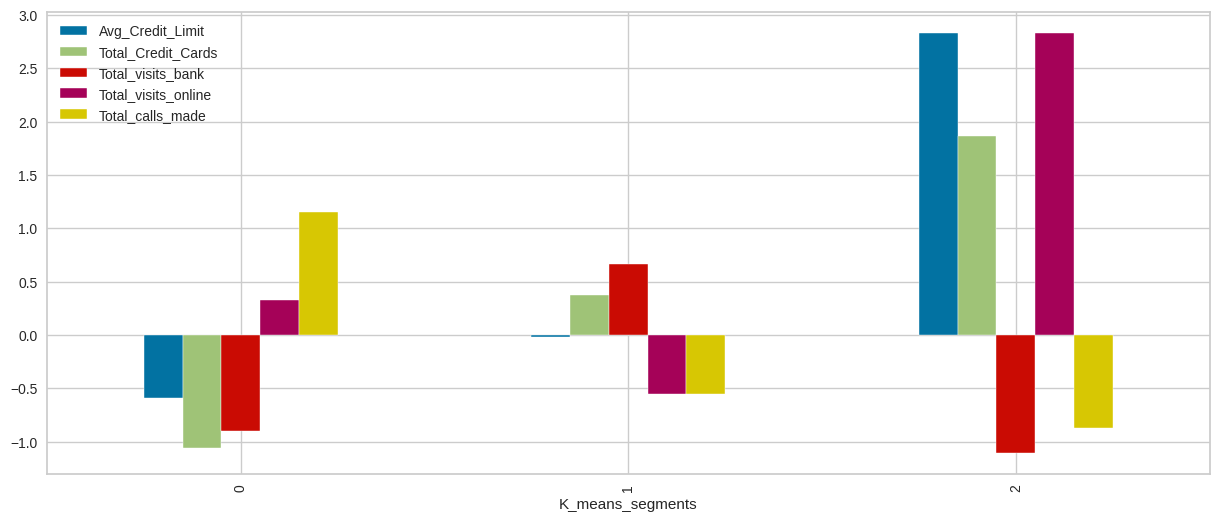

In [77]:
k_means_df.groupby("K_means_segments").mean().plot.bar(figsize=(15, 6))

<Axes: xlabel='HC_segments'>

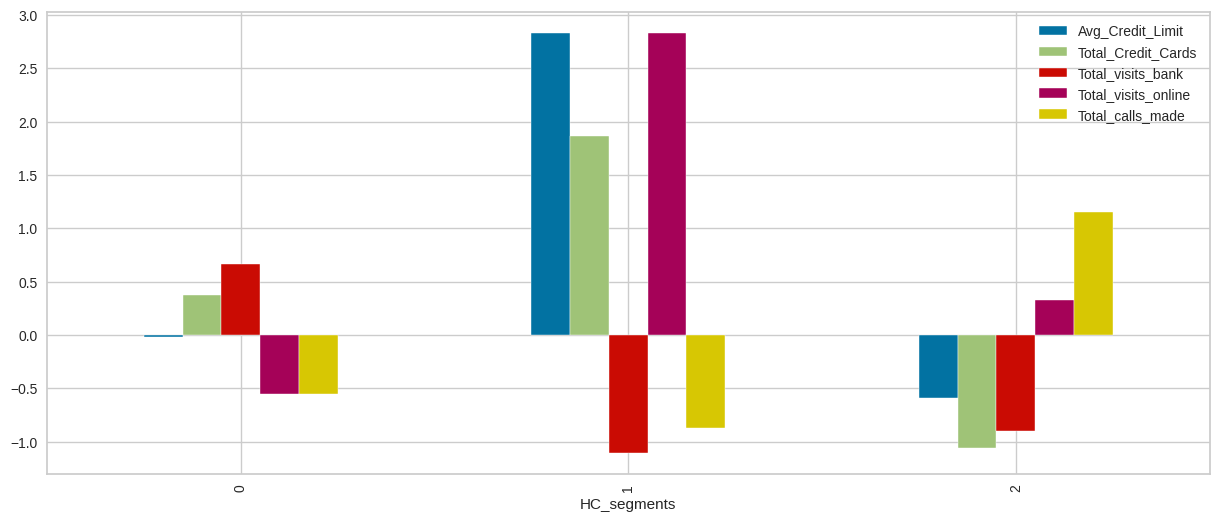

In [78]:
hc_df.groupby("HC_segments").mean().plot.bar(figsize=(15, 6))

#### **Let's create some plots on the original data to understand the customer distribution among the clusters.**

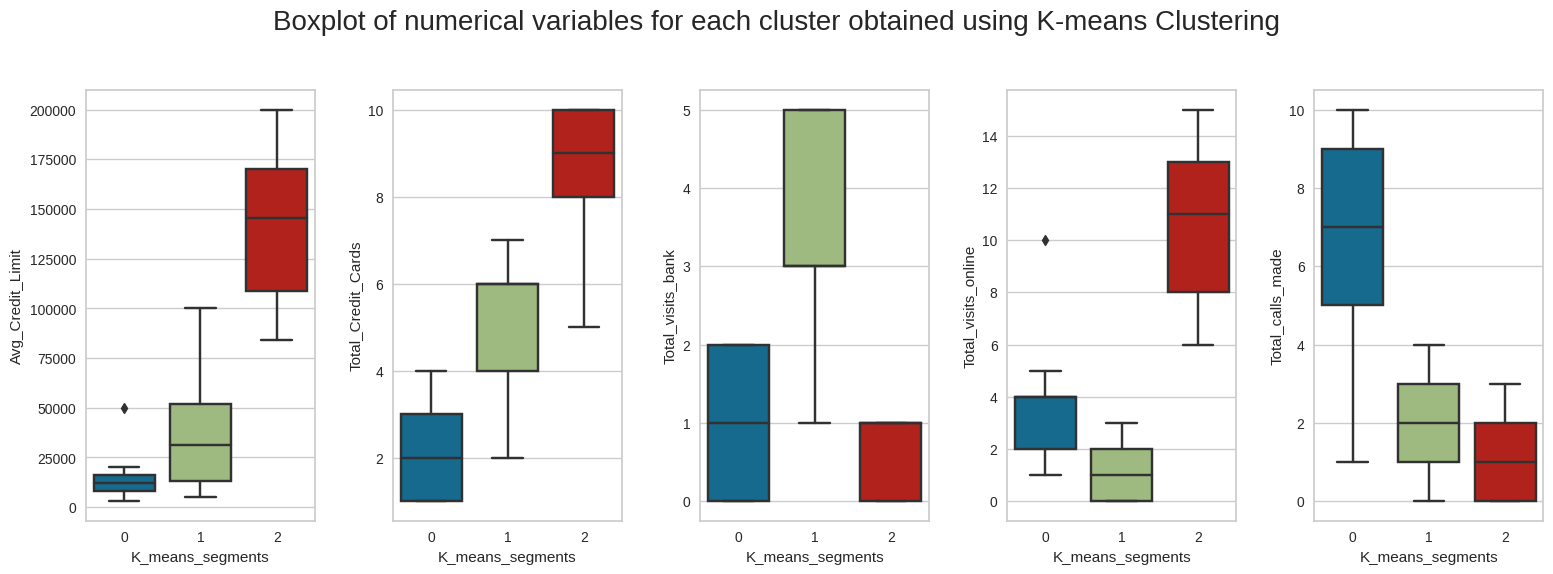

In [79]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using K-means Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(
        ax=axes[ii], y=df3[df3.columns[counter]], x=k_means_df["K_means_segments"]
    )
    counter = counter + 1

fig.tight_layout(pad=2.0)

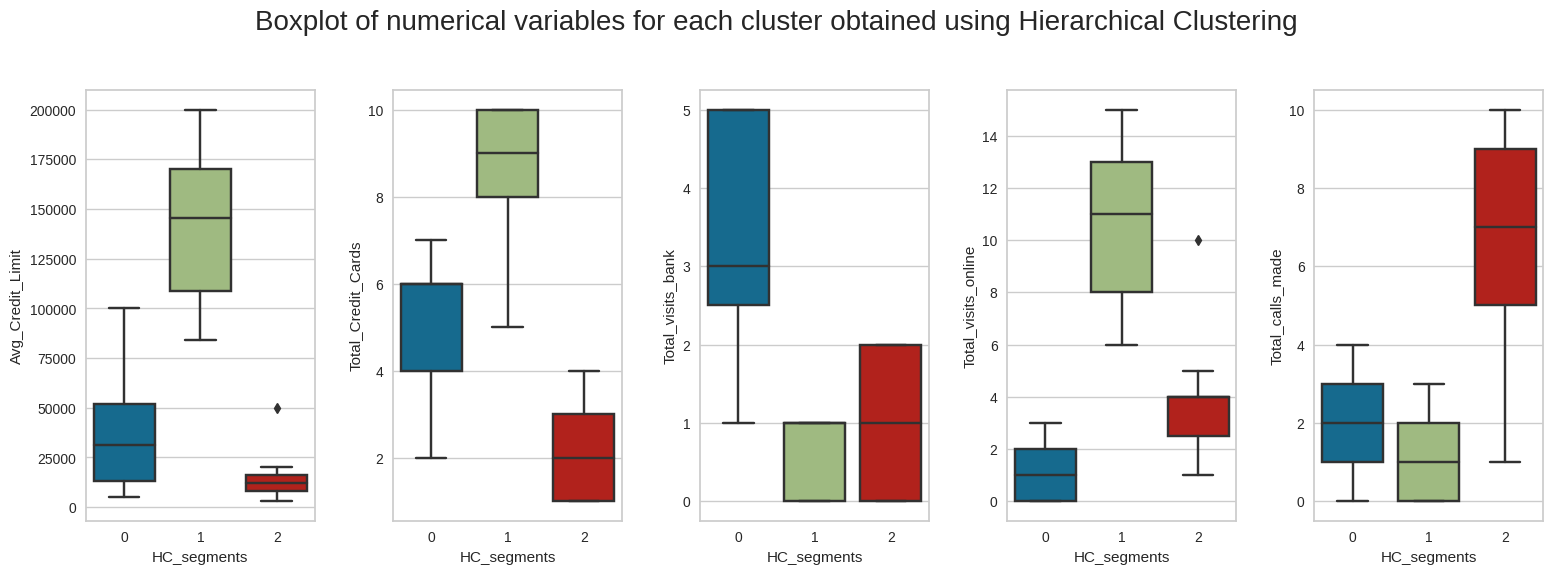

In [80]:
fig, axes = plt.subplots(1, 5, figsize=(16, 6))
fig.suptitle(
    "Boxplot of numerical variables for each cluster obtained using Hierarchical Clustering",
    fontsize=20,
)

counter = 0

for ii in range(5):
    sns.boxplot(ax=axes[ii], y=df4[df4.columns[counter]], x=hc_df["HC_segments"])
    counter = counter + 1

fig.tight_layout(pad=2.0)

You compare several things, like:





**Which clustering technique took less time for execution?**

  * The total time taken for execution of KMeans clustering with n_clusers =3 is 29 ms.
  * The total time taken to fit the Hierarchical cluster with n_clusters = 3 with Euclidean distance and Average linkage is 17.2 ms
  * **So, Hierarchical clustering took less time for execution.**

**Which clustering technique gave you more distinct clusters, or are they the same?**

* Both the KMeans and the Hierarchical method gave 3 distinct cluster
* The data distributions in these clusters are almost same for both KMeans and the Hierarchical method

**How many observations are there in the similar clusters of both algorithms?**

In [81]:
# For KMean clustering method, the data distribution is:
km_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
K_means_segments,,,,,,
0,12174.107143,2.410714,0.933036,3.553571,6.870536,224
1,33782.383420,5.515544,3.489637,0.981865,2.000000,386
2,141040.000000,8.740000,0.600000,10.900000,1.080000,50


* ****

In [82]:
# For Hierarchical clustering method, the data distribution is:
hc_cluster_profile.style.highlight_max(color="lightgreen", axis=0)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,count_in_each_segment
HC_segments,,,,,,
0,33713.178295,5.511628,3.485788,0.984496,2.005168,387
1,141040.000000,8.740000,0.600000,10.900000,1.080000,50
2,12197.309417,2.403587,0.928251,3.560538,6.883408,223


**How many clusters are obtained as the appropriate number of clusters from both algorithms?**

* From the KMeans clustering, we obtained 3 clusters. The clusters have 224, 386 and 50 observations each.
* From the Hierarchical clustering, we obtained 3 clusters. The clusters have 223, 387 and 50 observations each.
* Both the algorithms given very similar results. But, the time of execution of the Hierarchical clustering is just a little less compared to KMeans clustering.
* **So, we are going to select the clusters obtained using Hierarchical clustering to get our Actionable insights and make recommendations.**  

## Actionable Insights

## Insights



- **Cluster 0**:
    - This cluster contains medium Avg_Credit_Limits, with a median listing price of approximately 30,000.
    - The Total_Credit_Cards in these clusters lie between 2 and 7 and 50% of the time, it the number of credit cards lie in the range of 4 and 6.
    - The customers belonging to this cluster like to visit the bank personally the most compared to the other 2 clusters with a mean of 3 yearly bank visits.
    - The customers belonging to this cluster like to visit the bank's online portal the least compared to the other 2 clusters with a mean of only 1 yearly online visit.
    - This cluster contains medium number of total yearly calls made to the bank or its call center. The mean number of yearly calls made is 2.
    - From the above observations, we can conclude that the customers in this cluster are medium income, medium spending, less tech savvy customers who like to visit and call the bank, probably like older customers.
   

- **Cluster 1**:
    - This cluster contains highest Avg_Credit_Limits, with a median listing price of approximately 140,000.
    - The Total_Credit_Cards in these clusters lie between 5 and 10 and mean number of credit cards are 9 which is the highest among the other 2 clusters.
    - The customers belonging to this cluster do not like to visit the bank personally with a maximum of only 1 yearly bank visit. Most of the customers do not visit the bank personally at all.
    - The customers belonging to this cluster like to visit the bank's online portal the most compared to the other 2 clusters with a mean of about 11 yearly online visits.
    - This cluster contains the least number of total yearly calls made to the bank or its call center. The mean number of yearly calls made is only 1.
    - From the above observations, we can conclude that the customers in this cluster are high income, high spending, more tech savvy customers like business owners. They might also be frequent travellers.
    

- **Cluster 2**:
    - This cluster contains least Avg_Credit_Limits, with a median listing price of approximately only 12,000. The max limit is less than 25,000. But, there is a higher outlier with Avg_Credit_Limit of 50,000.
    - The Total_Credit_Cards in these clusters lie between 1 and 4 and mean number of credit cards is only 2 which is the least among the other 2 clusters.
    - The customers belonging to this cluster visit the bank personally about 2 times yearly, with a mean of only 1 yearly visit.
    - The customers belonging to this cluster like to visit the bank's online portal about 1 to 5 times yearly and not monthly. There is a higher outlier cutomer who has performed online visits 10 times yearly.
    - This cluster contains the highes number of total yearly calls made to the bank or its call center. The mean number of yearly calls made is about 7.
    - From the above observations, we can conclude that the customers in this cluster are low income, low spending, who like to visit the bank or call them and half the time also use the online bank portal.


## Recommendations

* Cluster 1 contains customers who are probably high income, high spending business owners who probably travel frequently. We can provide them higher reward points and hotel, airline and car rental credits.
* Since Cluster 1 customers are tech savvy, we should be able to provide them better online services like provide a user friendly bank app. The marketting team can also send emails or text messages about their campaigns or text reminders to such customers since they might prefer to not call or visit the bank personally.
* The Cluster 1 customers can also be provided digital entertainment credits, so that they can watch their favourite shows and games while they are on the go.

* Cluster 0 contains customers that are older or close to retirement customers who are medium earners and medium spenders that would like to visit the bank personally as they are not tech savvy and also do not want to call the bank.
* Cluster 0 customers do not travel much. We can provide them physical mails regarding the rewards and services provided by the bank during the campaigns.
* We can provide the Cluster 0 customers medium reward points and credits for restaurants, supermarkets, digital entertainment bundles etc.

* Cluster 1 contains customers that are low income or low spending custoemrs who would like to either visit the bank personally, visit online bank portal or call the bank. They have the least number of credit cards and hence least avg. credit limits.
*  We can send the Cluster 1 customers emails, text messages, make calls or send them physical mails, depending on their preference, to let them know about the services and new campaigns.
* We can provide cash backs on selective supermarket purchases, retail purchases, gas stations, etc. to attract them to use the credit card more.
* We can also provide them introductory 0% APR for a selected time so they can make purchases.

___